Welcome to my notebook! This is a copy/paste welcome message for all my notebooks :) 📓 This repository/notebook serves as a personal reminder for me, documenting code snippets and techniques sourced from various learning resources. The goal is to consolidate valuable information and create a basic reference guide. Please note that the codes included here are not originally mine, and credit goes to the respective authors and resources. Feel free to explore and use this collection as a shared learning space. Happy coding

#### Sources for this notebook : 
    * https://huggingface.co/docs/diffusers/using-diffusers/unconditional_image_generation 
    
#### Purpose :
    * Using DDPM by diffusers
    
#### Keywords :
    * Stable diffusion 
    * Schedulers

## PART 1- Unconditional Image Generation

'' Unconditional image generation generates images that look like a random sample from the training data the model was trained on because the denoising process is not guided by any additional context like text or image.''

In [1]:
from diffusers import DiffusionPipeline

generator = DiffusionPipeline.from_pretrained("anton-l/ddpm-butterflies-128").to("cuda")


C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\utils\outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
unet/config.json: 100%|██████████| 852/852 [00:00<00:00, 227kB/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/455M [00:00<?, ?B/s]
diffusion_pytorch_model.safetensors:   2%|▏         | 10.5M/455M [00:01<01:10, 6.29MB/s]
diffusion_pytorch_model.safetensors:   5%|▍         | 21.0M/455M [00:03<01:03, 6.86MB/s]
diffusion_pytorch_model.safetensors:   7%|▋         | 31.5M/455M [00:04<00:53, 7.86MB/s]
diffusion_pytorch_model.safetensors:   9%|▉         | 41

In [2]:
generator

DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.26.2",
  "_name_or_path": "anton-l/ddpm-butterflies-128",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

If you familiar to Diffusion models and DDPM paper, This pipeline is not a surprise... No need for encoder or tokenizer for prompt or somethingelse.

With a U-NET which is trained with similar images(for our case 'butterfly') and a scheduler is enough for denoising process of diffusion model

In [3]:
image = generator().images[0]

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Zeki\anaconda3\envs\stable_diff\lib\site-packages\diffusers\models\attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(
100%|██████████| 1000/1000 [00:57<00:00, 17.31it/s]


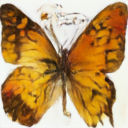

In [4]:
image

like the paper... T = 1000... But of course it is not a must... You can try different num_inference_steps parameter.

More denoising steps typically produce higher quality images, but it’ll take longer to generate.

100%|██████████| 100/100 [00:05<00:00, 18.21it/s]


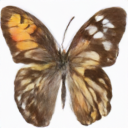

In [5]:
image = generator(num_inference_steps=100).images[0]
image

In [ ]:
# you can save image if you want.
image.save("generated_image.png")